Create Multilevel Piechart for MSFD Descriptors and indicators.

Libaries and Files

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

descriptor = pd.read_csv (r'C:\Users\marrigan\Work\Jupyter_Notebooks\MSFD_Pie\data\D1_GES_Level1.csv')
species = pd.read_csv (r'C:\Users\marrigan\Work\Jupyter_Notebooks\MSFD_Pie\data\D1_GES_Level2_C1.csv')


Colours

In [2]:
# For Legend and peripherals
ges_a = '#31F08E'
ges_pa = '#F0A622'
ges_na = '#e34732'
ges_u = '#f2f2f2'
ges_nt = '#7d7d7d'
circ = '#1c1c1c'
circ_txt = '#ffffff'

#for dfs
colours = {'ges_a' : '#31F08E',
           'ges_pa' : '#F0A622', 
           'ges_na' : '#e34732', 
           'ges_u' : '#f2f2f2', 
           'ges_nt' : '#7d7d7d', 
           'circ' : '#1c1c1c', 
           'circ_txt' : '#ffffff'}

descriptor['colour'] = descriptor['ges_assessment'].map(colours)
species['colour'] = species['species_assessment'].map(colours)


Setting inputs

Any new lines for text wrapping will need to be put into csv files as xoxo

In [3]:
descriptor_label = descriptor['descriptor']
descriptor_label = [w.replace('xoxo', '\n') for w in descriptor_label]    
descriptor_colour = descriptor['colour']
descriptor_weight = descriptor['weight']

#-----------------------------------------------------------------------------------------------------------------------

#-----------------------------------------------------------------------------------------------------------------------

species_label = species['species']
species_label = [w.replace('xoxo', '\n') for w in species_label]  
species_colour = species['colour']
species_weight = species['weight']


Data creation
Insure lists are same length and weights follow each level.

Draw 3 pie charts on top of eachother with a circle in the middle to cut out interior.

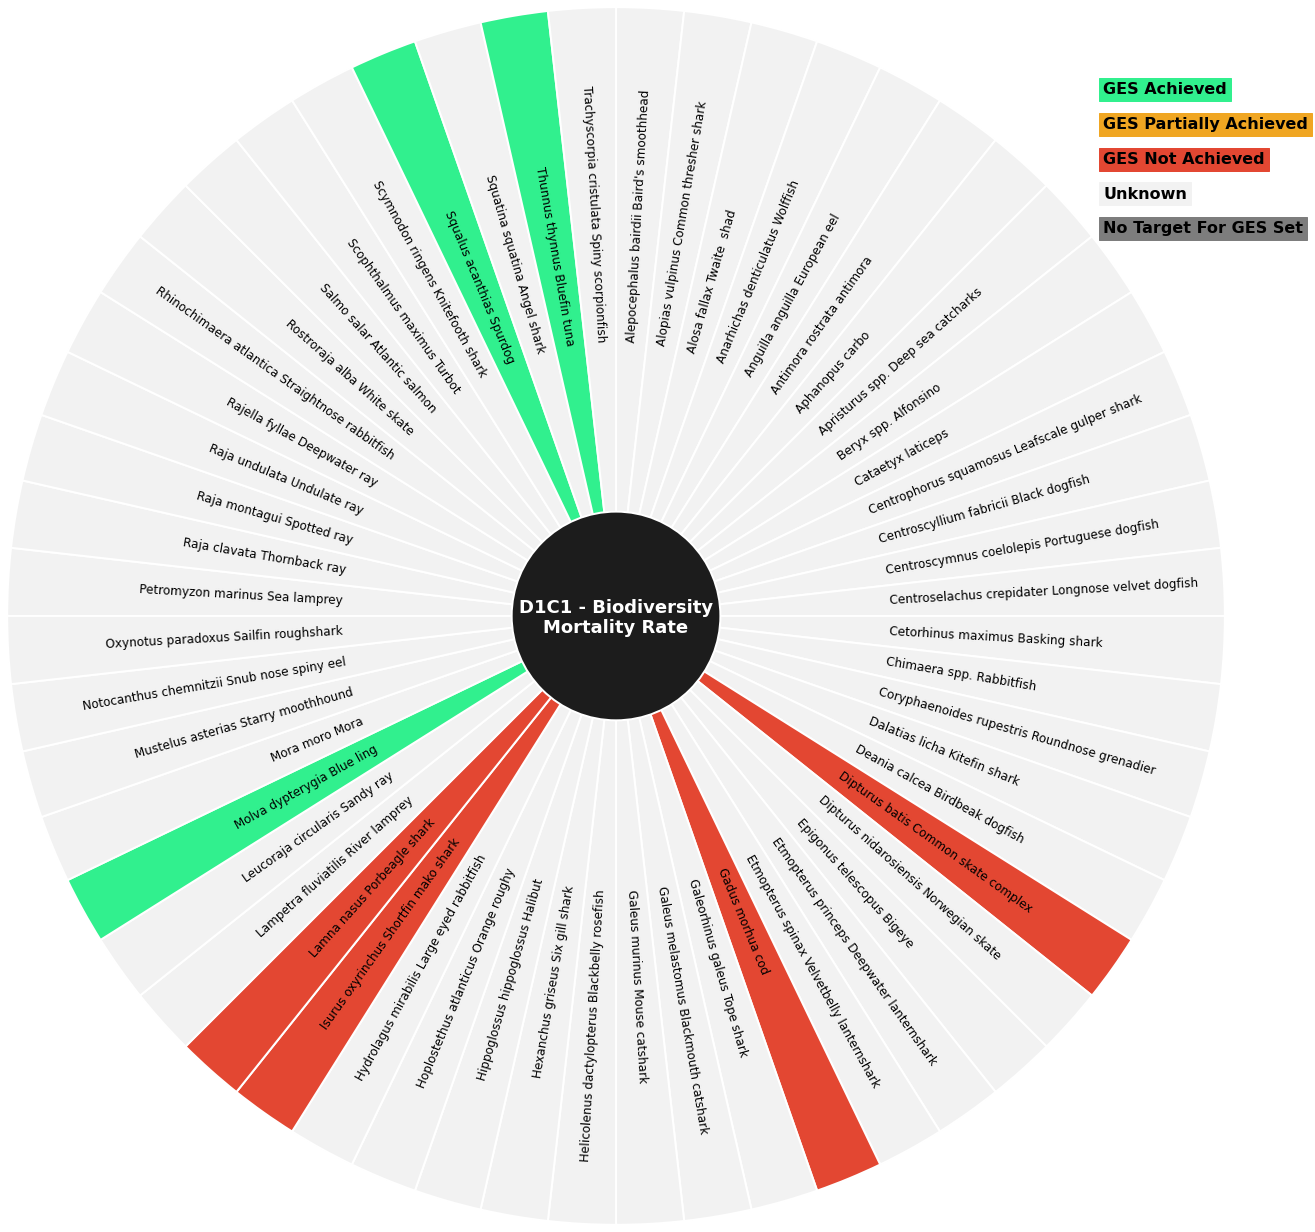

In [4]:
level_2 = plt.pie(species_weight, 
                  labels=species_label,
                  colors=species_colour,
                  labeldistance=(.45),
                  radius=7,
                  counterclock= False,
                  startangle= 90,
                  rotatelabels= True,
                  wedgeprops = {'linewidth': 2, 'ec':'#ffffff'},
                  textprops = {'fontsize': 12, 'rotation_mode':'anchor', 'va':'center', 'ma':'center', 'wrap':'True'}
                 )

# level_1 = plt.pie(descriptor_weight, 
#                   labels=descriptor_label,
#                   colors=descriptor_colour,
#                   labeldistance=(.65),
#                   radius= 2.5,
#                   counterclock= False,
#                   startangle= 90,
#                   rotatelabels= True,
#                   wedgeprops = {'linewidth': 2, 'ec':'#ffffff'},
#                   textprops = {'fontsize': 16, 'rotation_mode':'anchor', 'va':'center', 'ma':'center', 'fontweight':'bold', 'wrap':'True'}                 
#                  )


#-----------------------------------------------------------------------------------------------------------------------





### Legend text
plt.text(5.6,6.0, 'GES Achieved', fontsize=16,fontweight='bold',backgroundcolor=ges_a)
plt.text(5.6,5.6, 'GES Partially Achieved', fontsize=16,fontweight='bold',backgroundcolor=ges_pa)
plt.text(5.6,5.2, 'GES Not Achieved', fontsize=16,fontweight='bold',backgroundcolor=ges_na)
plt.text(5.6,4.8, 'Unknown', fontsize=16,fontweight='bold',backgroundcolor=ges_u)
plt.text(5.6,4.4, 'No Target For GES Set', fontsize=16,fontweight='bold',backgroundcolor=ges_nt)

fig = plt.gcf()

fig.set_facecolor('white')

centre_circle = plt.Circle((0, 0), radius=1.2, color=circ, linewidth=2, ec='#ffffff')
### Circle text
plt.text(0,-0.2, 'D1C1 - Biodiversity\nMortality Rate',fontsize=18, c=circ_txt,fontweight='bold', ha='center', ma='center')

fig.gca().add_artist(centre_circle)

fig.savefig('MSFD_Pie.png')
#, bbox_inches = 'tight'

